# An introduction to Mobile Phone Activity

# Introduciton


* The Mobile phone activity dataset is composed by one week of Call Details Records (CDRs) from the city of Milan and the Province of Trentino (Italy).

# Description of the dataset
Every time a user engages a telecommunication interaction, a Radio Base Station (RBS) is assigned by the operator and delivers the communication through the network. Then, a new CDR is created recording the time of the interaction and the RBS which handled it. The following activities are present in the dataset:

* received SMS
* sent SMS
* incoming calls
* outgoing calls
* Internet activity
In particular, Internet activity is generated each time a user starts an Internet connection or ends an Internet connection. Moreover, during the same connection a CDR is generated if the connection lasts for more than 15 min or the user transferred more than 5 MB.

The datasets is spatially aggregated in a square cells grid. The area of Milan is composed of a grid overlay of 1,000 (squares with size of about 235×235 meters. This grid is projected with the WGS84 (EPSG:4326) standard. For more details we link the original paper http://go.nature.com/2fcOX5E

The data provides CellID, CountryCode and all the aforementioned telecommunication activities aggregated every 60 minutes.

# import the libraries

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

# import the data

In [7]:
istat = pd.read_csv('ISTAT_census_variables_2011.csv')
mipro1 = pd.read_csv('mi-to-provinces-2013-11-01.csv')
mipro2 = pd.read_csv('mi-to-provinces-2013-11-02.csv')
mipro3 = pd.read_csv('mi-to-provinces-2013-11-03.csv')
mipro4 = pd.read_csv('mi-to-provinces-2013-11-04.csv')
mipro5 = pd.read_csv('mi-to-provinces-2013-11-05.csv')
mipro6 = pd.read_csv('mi-to-provinces-2013-11-06.csv')
mipro7 = pd.read_csv('mi-to-provinces-2013-11-07.csv')
smscall1 = pd.read_csv('sms-call-internet-mi-2013-11-01.csv')
smscall2 = pd.read_csv('sms-call-internet-mi-2013-11-02.csv')
smscall3 = pd.read_csv('sms-call-internet-mi-2013-11-03.csv')
smscall4 = pd.read_csv('sms-call-internet-mi-2013-11-04.csv')
smscall5 = pd.read_csv('sms-call-internet-mi-2013-11-05.csv')
smscall6 = pd.read_csv('sms-call-internet-mi-2013-11-06.csv')
smscall7 = pd.read_csv('sms-call-internet-mi-2013-11-07.csv')

# Exploratory data Analysis ( EDA )

## mi provinces nov 1

In [14]:
mipro1.head()

,datetime,CellID,provinceName,cell2Province,Province2cell
0,2013-11-01 00:00:00,1,MILANO,0.1894,0.0541
1,2013-11-01 00:00:00,1,PAVIA,0.0273,NaN
2,2013-11-01 00:00:00,1,TRENTO,0.0261,NaN
3,2013-11-01 00:00:00,2,MILANO,0.1922,0.0556
4,2013-11-01 00:00:00,2,PAVIA,0.0273,NaN


In [10]:
len(mipro1)

2307306

In [11]:
mipro1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2307306 entries, 0 to 2307305
Data columns (total 5 columns):
 #   Column         Dtype  
---  ------         -----  
 0   datetime       object 
 1   CellID         int64  
 2   provinceName   object 
 3   cell2Province  float64
 4   Province2cell  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 88.0+ MB


In [12]:
mipro1.describe()

,CellID,cell2Province,Province2cell
count,2.307306e+06,1.407931e+06,1.447630e+06
mean,5.142692e+03,6.463123e-01,6.312888e-01
std,2.782546e+03,2.473941e+00,2.451426e+00
min,1.000000e+00,0.000000e+00,0.000000e+00
25%,2.902000e+03,3.390000e-02,3.090000e-02
50%,5.158000e+03,1.101000e-01,1.050000e-01
75%,7.483000e+03,3.525000e-01,3.347000e-01
max,1.000000e+04,2.354432e+02,2.508271e+02


In [15]:
mipro1['CellID'].value_counts()

6165    923
6265    798
4554    765
6366    763
6267    741
       ... 
5192     27
5193     27
5093     27
5092     27
8028     23
Name: CellID, Length: 10000, dtype: int64

In [17]:
mipro1.isnull().sum()

datetime              0
CellID                0
provinceName          0
cell2Province    899375
Province2cell    859676
dtype: int64

In [18]:
mipro1['provinceName'].value_counts()

MILANO                   226487
MONZA E DELLA BRIANZA    108904
PAVIA                    107362
NAPOLI                    79804
BERGAMO                   79295
                          ...  
ORISTANO                   2103
NUORO                      2039
CARBONIA-IGLESIAS          1962
OGLIASTRA                  1035
MEDIO CAMPIDANO             637
Name: provinceName, Length: 110, dtype: int64

## mi provinces nov 2

In [20]:
mipro2.head()

,datetime,CellID,provinceName,cell2Province,Province2cell
0,2013-11-02 00:00:00,1,CREMONA,0.0273,NaN
1,2013-11-02 00:00:00,1,MILANO,0.0570,0.1087
2,2013-11-02 00:00:00,1,PAVIA,NaN,0.0546
3,2013-11-02 00:00:00,2,CREMONA,0.0273,NaN
4,2013-11-02 00:00:00,2,MILANO,0.0565,0.1102


In [21]:
len(mipro2)

2295314

In [22]:
smscall1.head()

,datetime,CellID,countrycode,smsin,smsout,callin,callout,internet
0,2013-11-01 00:00:00,1,0,0.3521,NaN,NaN,0.0273,NaN
1,2013-11-01 00:00:00,1,33,NaN,NaN,NaN,NaN,0.0261
2,2013-11-01 00:00:00,1,39,1.7322,1.1047,0.5919,0.4020,57.7729
3,2013-11-01 00:00:00,2,0,0.3581,NaN,NaN,0.0273,NaN
4,2013-11-01 00:00:00,2,33,NaN,NaN,NaN,NaN,0.0274


In [23]:
len(smscall1)

1891928

In [24]:
smscall2.head()

,datetime,CellID,countrycode,smsin,smsout,callin,callout,internet
0,2013-11-02 00:00:00,1,0,0.2445,NaN,NaN,NaN,NaN
1,2013-11-02 00:00:00,1,39,1.4952,1.1213,0.2708,0.3004,46.5094
2,2013-11-02 00:00:00,1,53,0.0018,0.0036,NaN,NaN,NaN
3,2013-11-02 00:00:00,2,0,0.2458,NaN,NaN,NaN,NaN
4,2013-11-02 00:00:00,2,39,1.5028,1.1243,0.2751,0.3023,46.6933


In [25]:
istat.head()

,PROVINCIA,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,E18,E19,E20,E21,E22,E23,E24,E25,E26,E27
0,Alessandria,427229,204983,222246,158222,198253,11481,44582,14691,85839,...,82121,27855,7197,84634,23155,10813,5564,2523,1896,280402
1,Asti,217573,105370,112203,82119,102538,5404,20767,6745,44773,...,49604,11716,3039,48074,12510,4775,2083,1194,786,134452
2,Biella,182192,86821,95371,69188,82431,5266,18474,6833,37017,...,25523,19595,5795,35030,11310,4776,2066,974,581,112204
3,Cuneo,586378,287786,298592,231452,276983,12473,49417,16053,127243,...,113200,43780,10393,106446,41341,18356,8181,3449,2278,402507
4,Novara,365559,176361,189198,143302,170741,9351,31811,10354,76929,...,40028,25384,5773,39561,22413,10224,4404,2272,1148,199727


In [26]:
len(istat)

110

In [27]:
istat.columns

Index(['PROVINCIA', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9',
       ...
       'E18', 'E19', 'E20', 'E21', 'E22', 'E23', 'E24', 'E25', 'E26', 'E27'],
      dtype='object', length=135)

In [28]:
istat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Columns: 135 entries, PROVINCIA to E27
dtypes: int64(134), object(1)
memory usage: 116.1+ KB


In [30]:
istat_cor = istat.corr()

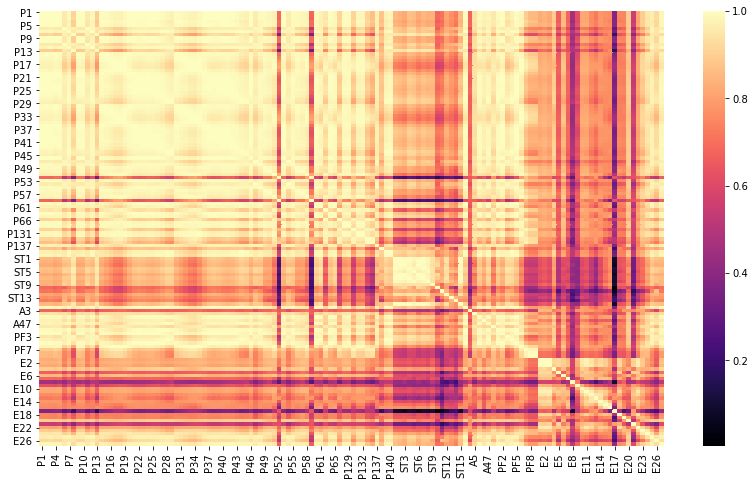

In [38]:
plt.figure(figsize = (14,8))
sns.heatmap(istat_cor , cmap = 'magma')

In [39]:
istat.head()

,PROVINCIA,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,E18,E19,E20,E21,E22,E23,E24,E25,E26,E27
0,Alessandria,427229,204983,222246,158222,198253,11481,44582,14691,85839,...,82121,27855,7197,84634,23155,10813,5564,2523,1896,280402
1,Asti,217573,105370,112203,82119,102538,5404,20767,6745,44773,...,49604,11716,3039,48074,12510,4775,2083,1194,786,134452
2,Biella,182192,86821,95371,69188,82431,5266,18474,6833,37017,...,25523,19595,5795,35030,11310,4776,2066,974,581,112204
3,Cuneo,586378,287786,298592,231452,276983,12473,49417,16053,127243,...,113200,43780,10393,106446,41341,18356,8181,3449,2278,402507
4,Novara,365559,176361,189198,143302,170741,9351,31811,10354,76929,...,40028,25384,5773,39561,22413,10224,4404,2272,1148,199727


In [40]:
istat['PROVINCIA'].value_counts()

Bolzano/Bozen    1
Biella           1
Salerno          1
Varese           1
Enna             1
                ..
Roma             1
Imperia          1
Macerata         1
Vicenza          1
Teramo           1
Name: PROVINCIA, Length: 110, dtype: int64

In [42]:
len(istat['PROVINCIA'].value_counts())

110

In [43]:
istat.isnull().sum()

PROVINCIA    0
P1           0
P2           0
P3           0
P4           0
            ..
E23          0
E24          0
E25          0
E26          0
E27          0
Length: 135, dtype: int64

# Feature Engineering

In [44]:
mipro1.head()

,datetime,CellID,provinceName,cell2Province,Province2cell
0,2013-11-01 00:00:00,1,MILANO,0.1894,0.0541
1,2013-11-01 00:00:00,1,PAVIA,0.0273,NaN
2,2013-11-01 00:00:00,1,TRENTO,0.0261,NaN
3,2013-11-01 00:00:00,2,MILANO,0.1922,0.0556
4,2013-11-01 00:00:00,2,PAVIA,0.0273,NaN


In [45]:
mipro1.isnull().sum()

datetime              0
CellID                0
provinceName          0
cell2Province    899375
Province2cell    859676
dtype: int64

In [46]:
mipro1['cell2Province'].mean()

0.646312309978259

In [47]:
mipro1['Province2cell'].mean()

0.631288812265565

In [48]:
mipro1['cell2Province'] = mipro1['cell2Province'].fillna(mipro1['cell2Province'].mean())

In [51]:
mipro1['Province2cell'] = mipro1['Province2cell'].fillna(mipro1['Province2cell'].mean())

In [52]:
mipro1.isnull().sum()

datetime         0
CellID           0
provinceName     0
cell2Province    0
Province2cell    0
dtype: int64

In [53]:
# for mi provinces nov 2

mipro2.head()

,datetime,CellID,provinceName,cell2Province,Province2cell
0,2013-11-02 00:00:00,1,CREMONA,0.0273,NaN
1,2013-11-02 00:00:00,1,MILANO,0.0570,0.1087
2,2013-11-02 00:00:00,1,PAVIA,NaN,0.0546
3,2013-11-02 00:00:00,2,CREMONA,0.0273,NaN
4,2013-11-02 00:00:00,2,MILANO,0.0565,0.1102


In [56]:
len(mipro2)

2295314

In [58]:
mipro2.isnull().sum()

datetime              0
CellID                0
provinceName          0
cell2Province    896877
Province2cell    855619
dtype: int64

In [61]:
mipro2['cell2Province'] = mipro2['cell2Province'].fillna(mipro2['cell2Province'].mean)

In [62]:
mipro2['Province2cell'] = mipro2['Province2cell'].fillna(mipro2['Province2cell'].mean)

In [63]:
mipro2.isnull().sum()

datetime         0
CellID           0
provinceName     0
cell2Province    0
Province2cell    0
dtype: int64

In [64]:
# for mi provinces nov 3

mipro3.head()

,datetime,CellID,provinceName,cell2Province,Province2cell
0,2013-11-03 00:00:00,1,MILANO,0.0546,0.0784
1,2013-11-03 00:00:00,1,PISA,0.0018,NaN
2,2013-11-03 00:00:00,2,MILANO,0.0546,0.0821
3,2013-11-03 00:00:00,2,PISA,0.0009,NaN
4,2013-11-03 00:00:00,3,MILANO,0.0546,0.0860


In [65]:
len(mipro3)

2129008

In [66]:
mipro3.isnull().sum()

datetime              0
CellID                0
provinceName          0
cell2Province    860597
Province2cell    781340
dtype: int64

In [67]:
mipro3['cell2Province'] = mipro3['cell2Province'].fillna(mipro3['cell2Province'].mean)
mipro3['Province2cell'] = mipro3['Province2cell'].fillna(mipro3['Province2cell'].mean)

In [68]:
mipro3.isnull().sum()

datetime         0
CellID           0
provinceName     0
cell2Province    0
Province2cell    0
dtype: int64

In [69]:
# for mi provinces nov 4

mipro4.head()

,datetime,CellID,provinceName,cell2Province,Province2cell
0,2013-11-04 00:00:00,1,MILANO,0.0018,NaN
1,2013-11-04 00:00:00,1,NAPOLI,NaN,0.0261
2,2013-11-04 00:00:00,2,MILANO,0.0009,NaN
3,2013-11-04 00:00:00,2,NAPOLI,NaN,0.0274
4,2013-11-04 00:00:00,3,NAPOLI,NaN,0.0287


In [70]:
len(mipro4)

3254567

In [71]:
mipro4.isnull().sum()

datetime               0
CellID                 0
provinceName           0
cell2Province    1234024
Province2cell    1091225
dtype: int64

In [72]:
mipro4['cell2Province'] = mipro4['cell2Province'].fillna(mipro4['cell2Province'].mean)
mipro4['Province2cell'] = mipro4['Province2cell'].fillna(mipro4['Province2cell'].mean)

In [73]:
mipro4.isnull().sum()

datetime         0
CellID           0
provinceName     0
cell2Province    0
Province2cell    0
dtype: int64

In [74]:
# for mi provinces nov 5

mipro5.head()

,datetime,CellID,provinceName,cell2Province,Province2cell
0,2013-11-05 00:00:00,1,MILANO,0.0873,0.1080
1,2013-11-05 00:00:00,1,NAPOLI,0.0546,0.0819
2,2013-11-05 00:00:00,2,MILANO,0.0847,0.1093
3,2013-11-05 00:00:00,2,NAPOLI,0.0546,0.0819
4,2013-11-05 00:00:00,3,MILANO,0.0819,0.1106


In [75]:
len(mipro5)

3354399

In [76]:
mipro5.isnull().sum()

datetime               0
CellID                 0
provinceName           0
cell2Province    1276462
Province2cell    1110805
dtype: int64

In [77]:
mipro5['cell2Province'] = mipro5['cell2Province'].fillna(mipro5['cell2Province'].mean)
mipro5['Province2cell'] = mipro5['Province2cell'].fillna(mipro5['Province2cell'].mean)

In [78]:
mipro5.isnull().sum()

datetime         0
CellID           0
provinceName     0
cell2Province    0
Province2cell    0
dtype: int64

In [79]:
# for mi provinces nov 6

mipro6.head()

,datetime,CellID,provinceName,cell2Province,Province2cell
0,2013-11-06 00:00:00,1,AREZZO,0.0273,NaN
1,2013-11-06 00:00:00,1,MILANO,0.0273,0.0261
2,2013-11-06 00:00:00,1,NAPOLI,0.0273,NaN
3,2013-11-06 00:00:00,2,AREZZO,0.0273,NaN
4,2013-11-06 00:00:00,2,MILANO,0.0273,0.0274


In [80]:
len(mipro6)

3365786

In [81]:
mipro6.isnull().sum()

datetime               0
CellID                 0
provinceName           0
cell2Province    1262778
Province2cell    1133386
dtype: int64

In [82]:
mipro6['cell2Province'] = mipro6['cell2Province'].fillna(mipro6['cell2Province'].mean)
mipro6['Province2cell'] = mipro6['Province2cell'].fillna(mipro6['Province2cell'].mean)

In [83]:
mipro6.isnull().sum()

datetime         0
CellID           0
provinceName     0
cell2Province    0
Province2cell    0
dtype: int64

In [84]:
# for mi provinces nov 7

mipro7.head()

,datetime,CellID,provinceName,cell2Province,Province2cell
0,2013-11-07 00:00:00,1,MILANO,0.0018,NaN
1,2013-11-07 00:00:00,1,PAVIA,0.0297,0.0018
2,2013-11-07 00:00:00,2,MILANO,0.0009,NaN
3,2013-11-07 00:00:00,2,PAVIA,0.0292,0.0009
4,2013-11-07 00:00:00,3,PAVIA,0.0287,NaN


In [85]:
len(mipro7)

3341083

In [86]:
mipro7.isnull().sum()

datetime               0
CellID                 0
provinceName           0
cell2Province    1254390
Province2cell    1121929
dtype: int64

In [87]:
mipro7['cell2Province'] = mipro7['cell2Province'].fillna(mipro7['cell2Province'].mean)
mipro7['Province2cell'] = mipro7['Province2cell'].fillna(mipro7['Province2cell'].mean)

In [88]:
mipro7.isnull().sum()

datetime         0
CellID           0
provinceName     0
cell2Province    0
Province2cell    0
dtype: int64

In [90]:
# sms call internet nov 1
smscall1.head()

,datetime,CellID,countrycode,smsin,smsout,callin,callout,internet
0,2013-11-01 00:00:00,1,0,0.3521,NaN,NaN,0.0273,NaN
1,2013-11-01 00:00:00,1,33,NaN,NaN,NaN,NaN,0.0261
2,2013-11-01 00:00:00,1,39,1.7322,1.1047,0.5919,0.4020,57.7729
3,2013-11-01 00:00:00,2,0,0.3581,NaN,NaN,0.0273,NaN
4,2013-11-01 00:00:00,2,33,NaN,NaN,NaN,NaN,0.0274


In [91]:
len(smscall1)

1891928

In [92]:
smscall1.isnull().sum()

datetime             0
CellID               0
countrycode          0
smsin          1086153
smsout         1422446
callin         1407781
callout        1037413
internet       1087074
dtype: int64

In [95]:
smscall1['smsin'] = smscall1['smsin'].fillna(smscall1['smsin'].mean())
smscall1['smsout']= smscall1['smsout'].fillna(smscall1['smsout'].mean())
smscall1['callin'] = smscall1['callin'].fillna(smscall1['callin'].mean())
smscall1['callout'] = smscall1['callout'].fillna(smscall1['callout'].mean())
smscall1['internet'] = smscall1['internet'].fillna(smscall1['internet'].mean())

In [96]:
smscall1.isnull().sum()

datetime       0
CellID         0
countrycode    0
smsin          0
smsout         0
callin         0
callout        0
internet       0
dtype: int64

In [97]:
# sms call internet nov 2

smscall2.head()

,datetime,CellID,countrycode,smsin,smsout,callin,callout,internet
0,2013-11-02 00:00:00,1,0,0.2445,NaN,NaN,NaN,NaN
1,2013-11-02 00:00:00,1,39,1.4952,1.1213,0.2708,0.3004,46.5094
2,2013-11-02 00:00:00,1,53,0.0018,0.0036,NaN,NaN,NaN
3,2013-11-02 00:00:00,2,0,0.2458,NaN,NaN,NaN,NaN
4,2013-11-02 00:00:00,2,39,1.5028,1.1243,0.2751,0.3023,46.6933


In [98]:
smscall2.isnull().sum()

datetime             0
CellID               0
countrycode          0
smsin          1064004
smsout         1385745
callin         1376883
callout        1015556
internet       1043979
dtype: int64

In [99]:
smscall2['smsin'] = smscall2['smsin'].fillna(smscall2['smsin'].mean())
smscall2['smsout']= smscall2['smsout'].fillna(smscall2['smsout'].mean())
smscall2['callin'] = smscall2['callin'].fillna(smscall2['callin'].mean())
smscall2['callout'] = smscall2['callout'].fillna(smscall2['callout'].mean())
smscall2['internet'] = smscall2['internet'].fillna(smscall2['internet'].mean())

In [100]:
smscall2.isnull().sum()

datetime       0
CellID         0
countrycode    0
smsin          0
smsout         0
callin         0
callout        0
internet       0
dtype: int64

In [101]:
# sms call internet nov 3

smscall3.head()

,datetime,CellID,countrycode,smsin,smsout,callin,callout,internet
0,2013-11-03 00:00:00,1,0,0.2221,NaN,NaN,0.0534,NaN
1,2013-11-03 00:00:00,1,39,0.9891,0.8306,0.2481,0.5635,54.5778
2,2013-11-03 00:00:00,2,0,0.2223,NaN,NaN,0.0547,NaN
3,2013-11-03 00:00:00,2,39,0.9946,0.8315,0.2476,0.5748,54.7746
4,2013-11-03 00:00:00,3,0,0.2225,NaN,NaN,0.0560,NaN


In [103]:
smscall3.isnull().sum()

datetime             0
CellID               0
countrycode          0
smsin          1045136
smsout         1372198
callin         1362366
callout         985747
internet       1062048
dtype: int64

In [104]:
smscall3['smsin'] = smscall3['smsin'].fillna(smscall3['smsin'].mean())
smscall3['smsout']= smscall3['smsout'].fillna(smscall3['smsout'].mean())
smscall3['callin'] = smscall3['callin'].fillna(smscall3['callin'].mean())
smscall3['callout'] = smscall3['callout'].fillna(smscall3['callout'].mean())
smscall3['internet'] = smscall3['internet'].fillna(smscall3['internet'].mean())

In [105]:
smscall3.isnull().sum()

datetime       0
CellID         0
countrycode    0
smsin          0
smsout         0
callin         0
callout        0
internet       0
dtype: int64

In [106]:
# sms call internet nov 4

smscall4.head()

,datetime,CellID,countrycode,smsin,smsout,callin,callout,internet
0,2013-11-04 00:00:00,1,0,0.1080,NaN,NaN,NaN,NaN
1,2013-11-04 00:00:00,1,39,1.0266,0.8069,0.0552,0.2155,50.342
2,2013-11-04 00:00:00,2,0,0.1093,NaN,NaN,NaN,NaN
3,2013-11-04 00:00:00,2,39,1.0430,0.8226,0.0556,0.2195,50.432
4,2013-11-04 00:00:00,3,0,0.1106,NaN,NaN,NaN,NaN


In [107]:
smscall4.isnull().sum()

datetime             0
CellID               0
countrycode          0
smsin          1404456
smsout         1768331
callin         1648923
callout        1324029
internet       1273438
dtype: int64

In [108]:
len(smscall4)

2299544

In [109]:
smscall4['smsin'] = smscall4['smsin'].fillna(smscall4['smsin'].mean())
smscall4['smsout']= smscall4['smsout'].fillna(smscall4['smsout'].mean())
smscall4['callin'] = smscall4['callin'].fillna(smscall4['callin'].mean())
smscall4['callout'] = smscall4['callout'].fillna(smscall4['callout'].mean())
smscall4['internet'] = smscall4['internet'].fillna(smscall4['internet'].mean())

In [110]:
smscall4.isnull().sum()

datetime       0
CellID         0
countrycode    0
smsin          0
smsout         0
callin         0
callout        0
internet       0
dtype: int64

In [111]:
# sms call internet nov 5

smscall5.head()

,datetime,CellID,countrycode,smsin,smsout,callin,callout,internet
0,2013-11-05 00:00:00,1,0,0.1098,NaN,NaN,NaN,NaN
1,2013-11-05 00:00:00,1,33,NaN,NaN,NaN,NaN,0.0261
2,2013-11-05 00:00:00,1,39,1.5658,1.2285,0.2505,0.3503,56.4289
3,2013-11-05 00:00:00,1,44,0.0018,NaN,NaN,NaN,NaN
4,2013-11-05 00:00:00,1,46,NaN,NaN,NaN,NaN,0.0261


In [112]:
len(smscall5)

2397759

In [113]:
smscall5.isnull().sum()

datetime             0
CellID               0
countrycode          0
smsin          1477440
smsout         1856349
callin         1720381
callout        1399786
internet       1299692
dtype: int64

In [114]:
smscall5['smsin'] = smscall5['smsin'].fillna(smscall5['smsin'].mean())
smscall5['smsout']= smscall5['smsout'].fillna(smscall5['smsout'].mean())
smscall5['callin'] = smscall5['callin'].fillna(smscall5['callin'].mean())
smscall5['callout'] = smscall5['callout'].fillna(smscall5['callout'].mean())
smscall5['internet'] = smscall5['internet'].fillna(smscall5['internet'].mean())

In [115]:
smscall5.isnull().sum()

datetime       0
CellID         0
countrycode    0
smsin          0
smsout         0
callin         0
callout        0
internet       0
dtype: int64

In [116]:
# sms call internet nov 6

smscall6.head()

,datetime,CellID,countrycode,smsin,smsout,callin,callout,internet
0,2013-11-06 00:00:00,1,0,0.0814,NaN,NaN,NaN,NaN
1,2013-11-06 00:00:00,1,39,0.7458,0.7204,0.1626,0.1057,52.3219
2,2013-11-06 00:00:00,2,0,0.0829,NaN,NaN,NaN,NaN
3,2013-11-06 00:00:00,2,39,0.7653,0.7409,0.1639,0.1094,52.4064
4,2013-11-06 00:00:00,3,0,0.0846,NaN,NaN,NaN,NaN


In [117]:
len(smscall6)

2417156

In [118]:
smscall6.isnull().sum()

datetime             0
CellID               0
countrycode          0
smsin          1495711
smsout         1871662
callin         1735879
callout        1424899
internet       1303700
dtype: int64

In [119]:
smscall6['smsin'] = smscall6['smsin'].fillna(smscall6['smsin'].mean())
smscall6['smsout']= smscall6['smsout'].fillna(smscall6['smsout'].mean())
smscall6['callin'] = smscall6['callin'].fillna(smscall6['callin'].mean())
smscall6['callout'] = smscall6['callout'].fillna(smscall6['callout'].mean())
smscall6['internet'] = smscall6['internet'].fillna(smscall6['internet'].mean())

In [120]:
smscall6.isnull().sum()

datetime       0
CellID         0
countrycode    0
smsin          0
smsout         0
callin         0
callout        0
internet       0
dtype: int64

In [121]:
# sms call internet nov 7

smscall7.head()

,datetime,CellID,countrycode,smsin,smsout,callin,callout,internet
0,2013-11-07 00:00:00,1,0,0.2463,NaN,NaN,NaN,NaN
1,2013-11-07 00:00:00,1,39,1.4627,1.6610,0.2999,0.1644,55.8591
2,2013-11-07 00:00:00,2,0,0.2467,NaN,NaN,NaN,NaN
3,2013-11-07 00:00:00,2,39,1.4768,1.6736,0.3033,0.1648,56.0243
4,2013-11-07 00:00:00,3,0,0.2471,NaN,NaN,NaN,NaN


In [122]:
len(smscall7)

2407384

In [123]:
smscall7.isnull().sum()

datetime             0
CellID               0
countrycode          0
smsin          1492720
smsout         1865924
callin         1727643
callout        1417432
internet       1299270
dtype: int64

In [124]:
smscall7['smsin'] = smscall7['smsin'].fillna(smscall7['smsin'].mean())
smscall7['smsout']= smscall7['smsout'].fillna(smscall7['smsout'].mean())
smscall7['callin'] = smscall7['callin'].fillna(smscall7['callin'].mean())
smscall7['callout'] = smscall7['callout'].fillna(smscall7['callout'].mean())
smscall7['internet'] = smscall7['internet'].fillna(smscall7['internet'].mean())

In [125]:
smscall7.isnull().sum()

datetime       0
CellID         0
countrycode    0
smsin          0
smsout         0
callin         0
callout        0
internet       0
dtype: int64

In [127]:
smscall1.head()

,datetime,CellID,countrycode,smsin,smsout,callin,callout,internet
0,2013-11-01 00:00:00,1,0,0.352100,6.011796,5.417363,0.027300,102.477277
1,2013-11-01 00:00:00,1,33,5.716717,6.011796,5.417363,3.741025,0.026100
2,2013-11-01 00:00:00,1,39,1.732200,1.104700,0.591900,0.402000,57.772900
3,2013-11-01 00:00:00,2,0,0.358100,6.011796,5.417363,0.027300,102.477277
4,2013-11-01 00:00:00,2,33,5.716717,6.011796,5.417363,3.741025,0.027400
